## Project Scripts


In [1]:
from util_func import *
from feature_config import *

import warnings
warnings.filterwarnings('ignore')

## STEP 1: Data and Folder Path Setup

- Creat a folder called 'data' under your project directory, and save all the raw 'csv' files here. Move all 'data_set_*.csv' files into folder 'data/data_set'

- Creat below folders to save flat files during the analysis:
    - 'data/raw_feature': to save the unfiltered raw feature data as daily files
    - 'data/filtered_feature': to save the filtered raw feature data as daily files
    - 'data/feature_res': to save the constructed feature results


**1.1 Data Collect and Cache (only need to run once, can skip once the pickle file is saved)** <br>

In [15]:
#Only need to run once, it will save files as pickle file, no need to run it later.
# collect_and_cache_data()

**1.2 Read processed data from saved pickle files and generate useful index/lists**

In [2]:
__ref_df__ = pd.read_pickle('data/ref_df.pkl.gz')
__fea_raw__ = pd.read_pickle('data/feature_raw.pkl.gz')
__risk_df__ = pd.read_pickle('data/risk_df.pkl.gz')

#get all trade dates
all_ref_dates = __ref_df__['data_date'].copy().drop_duplicates().to_list()
ref_date_map = pd.DataFrame(all_ref_dates, columns=['data_date'])

#sec_univ gives the list of securities in trading universe for each trade date
daily_sec_univ = __ref_df__[__ref_df__['in_trading_universe']=='Y'][['data_date', 'security_id']].copy().set_index('data_date')
#all_name gives all the securities has ever been tradable in all historical period
all_names_univ = __ref_df__[__ref_df__['in_trading_universe']=='Y']['security_id'].copy().drop_duplicates().to_list()

#d1 to d7 are event driven features (type 1), while d8 to d11 are non-event driven features (type2 2)
f_col = [f'd{i}' for i in range(1, 12)]
f_col_type1 = f_col[:7]
f_col_type2 = f_col[7:]

## Step 2: Feature Engineering

#### 2.1 Basic Feature Construction

Construct on raw features globally and also run the industry neutral version on group level 1

In [5]:
#build basic features, obtaining a dataframe with processed basic feature values
basic_fea = {}

for trade_date in all_ref_dates:
    res = build_basic_fea(trade_date, ref_date_map, func=group_z, f_col_group=f_col)
    basic_fea[trade_date] = res

basic_all = pd.concat(basic_fea)
basic_all.index.names= ['data_date', 'security_id']
basic_all.to_pickle('data/feature_res/basic_feature.pkl.gz')

basic feature on [2010-01-04 00:00:00] takes [0.0] seconds
basic feature on [2010-01-05 00:00:00] takes [0.1] seconds
basic feature on [2010-01-06 00:00:00] takes [0.1] seconds
basic feature on [2010-01-07 00:00:00] takes [0.1] seconds
basic feature on [2010-01-08 00:00:00] takes [0.1] seconds
basic feature on [2010-01-11 00:00:00] takes [0.1] seconds
basic feature on [2010-01-12 00:00:00] takes [0.1] seconds
basic feature on [2010-01-13 00:00:00] takes [0.1] seconds
basic feature on [2010-01-14 00:00:00] takes [0.1] seconds
basic feature on [2010-01-15 00:00:00] takes [0.1] seconds
basic feature on [2010-01-19 00:00:00] takes [0.1] seconds
basic feature on [2010-01-20 00:00:00] takes [0.1] seconds
basic feature on [2010-01-21 00:00:00] takes [0.1] seconds
basic feature on [2010-01-22 00:00:00] takes [0.1] seconds
basic feature on [2010-01-25 00:00:00] takes [0.1] seconds
basic feature on [2010-01-26 00:00:00] takes [0.1] seconds
basic feature on [2010-01-27 00:00:00] takes [0.1] secon

#### 2.2 Change Features Construction



Construct change features for two different types: event driven features and non-event driven features
d1 to d7 are event driven features, while d8 to d11 are non-event driven features (also run the industry neutral version in group level 1)

In [6]:
#build the change features for type 2 features, i.e. non-event-driven features
dif_fea_type2 = {}

for trade_date in all_ref_dates:
    res = build_dif_fea_type2(trade_date, ref_date_map, func=group_z, f_col_group=f_col_type2)
    dif_fea_type2[trade_date] = res

dif_type2_all = pd.concat(dif_fea_type2)
dif_type2_all.index.names= ['data_date', 'security_id']
dif_type2_all.to_pickle('data/feature_res/dif_type2_all.pkl.gz')

change feature type 2 on [2010-01-04 00:00:00] takes [0.0] seconds
change feature type 2 on [2010-01-05 00:00:00] takes [0.0] seconds
change feature type 2 on [2010-01-06 00:00:00] takes [0.6] seconds
change feature type 2 on [2010-01-07 00:00:00] takes [0.4] seconds
change feature type 2 on [2010-01-08 00:00:00] takes [0.4] seconds
change feature type 2 on [2010-01-11 00:00:00] takes [0.4] seconds
change feature type 2 on [2010-01-12 00:00:00] takes [0.4] seconds
change feature type 2 on [2010-01-13 00:00:00] takes [0.4] seconds
change feature type 2 on [2010-01-14 00:00:00] takes [0.4] seconds
change feature type 2 on [2010-01-15 00:00:00] takes [0.4] seconds
change feature type 2 on [2010-01-19 00:00:00] takes [0.4] seconds
change feature type 2 on [2010-01-20 00:00:00] takes [0.4] seconds
change feature type 2 on [2010-01-21 00:00:00] takes [0.4] seconds
change feature type 2 on [2010-01-22 00:00:00] takes [0.5] seconds
change feature type 2 on [2010-01-25 00:00:00] takes [0.4] sec

In [9]:
#build the change features for type 1 features, i.e. event-driven features
dif_fea_type1 = {}

for trade_date in all_ref_dates:
    sec_ls = daily_sec_univ.loc[trade_date,'security_id'].to_list()
    res = build_dif_fea_type1(trade_date, ref_date_map, sec_ls, f_col_group=f_col_type1)
    dif_fea_type1[trade_date] = res

dif_type1_all = pd.concat(dif_fea_type1)
dif_type1_all.index.names= ['data_date', 'security_id']
dif_type1_all.to_pickle('data/feature_res/dif_type1_all.pkl.gz')

change feature type 1 on [2010-01-04 00:00:00] takes [0.1] seconds
change feature type 1 on [2010-01-05 00:00:00] takes [0.1] seconds
change feature type 1 on [2010-01-06 00:00:00] takes [0.0] seconds
change feature type 1 on [2010-01-07 00:00:00] takes [0.1] seconds
change feature type 1 on [2010-01-08 00:00:00] takes [0.1] seconds
change feature type 1 on [2010-01-11 00:00:00] takes [0.1] seconds
change feature type 1 on [2010-01-12 00:00:00] takes [0.0] seconds
change feature type 1 on [2010-01-13 00:00:00] takes [0.1] seconds
change feature type 1 on [2010-01-14 00:00:00] takes [0.1] seconds
change feature type 1 on [2010-01-15 00:00:00] takes [0.0] seconds
change feature type 1 on [2010-01-19 00:00:00] takes [0.1] seconds
change feature type 1 on [2010-01-20 00:00:00] takes [0.1] seconds
change feature type 1 on [2010-01-21 00:00:00] takes [0.1] seconds
change feature type 1 on [2010-01-22 00:00:00] takes [0.0] seconds
change feature type 1 on [2010-01-25 00:00:00] takes [0.1] sec

#### 2.3 Peer Spread Feature Construction

Use group_level_1 information and historical return to select 5 peer securities as security i 's peer group. Calculate the average return spread in defined time window as the Peer Spread Feature

In [ ]:
#build the peer spread features using customized time window
peer_fea = {}

for trade_date in all_ref_dates:
    sec_ls = daily_sec_univ.loc[trade_date, 'security_id'].to_list()
    ref0 = __ref_df__.loc[__ref_df__['data_date']==pd.to_datetime(trade_date)].copy()
    #find all security list including ones not in the trading universe
    sec_all_ls = ref0['security_id'].drop_duplicates().to_list()
    ret_date_to = find_dates(trade_date, ref_date_map, -1, 0)
    ret_date_from = find_dates(trade_date, ref_date_map, -126, 0)

    if ret_date_from is not None:
        peer_ret_df_input = __ref_df__.loc[(__ref_df__['data_date'].between(ret_date_from, ret_date_to)) &
                            (__ref_df__['security_id'].isin(sec_all_ls))].pivot(index=['data_date'], columns='security_id', values='ret1d')

        res = build_peer_spread(trade_date, sec_ls, ref0, peer_ret_df_input)
        peer_fea[trade_date] = res

fea_peer_all = pd.concat(peer_fea)
fea_peer_all.index.names= ['data_date', 'security_id']
fea_peer_all.to_pickle('data/feature_res/fea_peer_all.pkl.gz')

peer spread feature on trade date [2010-07-06] takes [2.4] seconds
peer spread feature on trade date [2010-07-07] takes [2.4] seconds
peer spread feature on trade date [2010-07-08] takes [2.3] seconds
peer spread feature on trade date [2010-07-09] takes [2.4] seconds
peer spread feature on trade date [2010-07-12] takes [2.4] seconds
peer spread feature on trade date [2010-07-13] takes [2.4] seconds
peer spread feature on trade date [2010-07-14] takes [2.6] seconds
peer spread feature on trade date [2010-07-15] takes [2.4] seconds
peer spread feature on trade date [2010-07-16] takes [2.3] seconds
peer spread feature on trade date [2010-07-19] takes [2.4] seconds
peer spread feature on trade date [2010-07-20] takes [2.3] seconds
peer spread feature on trade date [2010-07-21] takes [2.4] seconds
peer spread feature on trade date [2010-07-22] takes [2.4] seconds
peer spread feature on trade date [2010-07-23] takes [2.4] seconds
peer spread feature on trade date [2010-07-26] takes [2.4] sec

## Step 3: Feature Backtest and Smoothing

##### 1 Run backtesting (Calculate the annualized Sharpe Ratio of each of the 15 future returns)
##### 2 Pick features based on sharpe ratios and run smoothing process
##### 3 Finalize the Feature Choice for Portfolio Construction


In [56]:
#obtain the future n days' returns for security list
ret_df = get_future_ret(__ref_df__, all_names_univ, all_ref_dates, 15)
ret_cols = [f'ret_post_{i}' for i in range(1, 16)]

#Read all constructed feature data set
file_paths = glob.glob('data/feature_res/*.pkl.gz')
ls = []
for f in file_paths:
    df = pd.read_pickle(f)
    ls.append(df)

merged_fea_df = reduce(lambda left, right: left.merge(right, how='left', on=['data_date','security_id']), ls)
fea_cols = sorted(merged_fea_df.columns.tolist())

#Merge future return to merged feature date
merged_df = pd.merge(merged_fea_df, ret_df, on=['data_date','security_id'], how='left')
merged_df.to_pickle('data/merged_df.pkl.gz')

In [65]:
#backtesting is performed for each year and also for the whole training period
df = pd.read_pickle('data/merged_df.pkl.gz')
# df = merged_df.copy()
backtest_ls={}
for i in range(2010, 2016):
    start_date = pd.to_datetime(f"{i}-01-01")
    end_date = pd.to_datetime(f"{i}-12-31")
    df_run = df[(df.index.get_level_values('data_date') <= end_date) & (df.index.get_level_values('data_date') >= start_date)].copy()
    ret_df, res_df = backtest_ret(df_run, fea_cols, ret_cols)
    backtest_ls[str(i)] = res_df

df_train = df[df.index.get_level_values('data_date') <= pd.to_datetime("2015-12-31")].copy()
ret_mean, ret_sr_matrix = backtest_ret(df_train, fea_cols, ret_cols)
backtest_ls['train'] = ret_sr_matrix
backtest_res = pd.concat(backtest_ls).copy().reset_index().rename(columns={'level_0':'training_period'}).set_index(['feature', 'training_period']).sort_values(['feature', 'training_period'])
backtest_res.to_csv('data/backtest_res.csv')

 ### Smoothing

##### Selected Feature and its chosen lags are defined in SMOOTH_CONFIG, use 'average' to calculate the final smoothed features.

In [5]:
# build smoothed features
from feature_config import SMOOTH_CONFIG

merged_df = pd.read_pickle('data/merged_df.pkl.gz')
col_to_keep = merged_df.columns.intersection(SMOOTH_CONFIG.keys())
fea_under = merged_df[col_to_keep].copy()

smo_fea = {}

for trade_date in all_ref_dates:
    sec_ls = daily_sec_univ.loc[trade_date, 'security_id'].to_list()
    fea_date_to = find_dates(trade_date, ref_date_map, 0, 0)
    fea_date_from = find_dates(trade_date, ref_date_map, -14, 0)

    if fea_date_from is not None:
        fea_df = fea_under.loc[fea_date_from:fea_date_to].copy()
        fea_df = fea_df.loc[fea_df.index.get_level_values(level='security_id').isin(sec_ls)].copy()
        dts_map = pd.Series(index=sorted(find_dates(trade_date, ref_date_map, shift=0, n=15))[::-1],
                            data=range(0, 15))
        fea_df = fea_df.rename(index=dts_map, level='data_date')
        res = build_smo_fea(trade_date, sec_ls, fea_df, SMOOTH_CONFIG)
        smo_fea[trade_date] = res

fea_smo_all = pd.concat(smo_fea)
fea_smo_all.to_pickle('data/fea_smo_all.pkl.gz')

smoothed feature on trade date [2010-01-25] takes [0.3] seconds
smoothed feature on trade date [2010-01-26] takes [0.2] seconds
smoothed feature on trade date [2010-01-27] takes [0.2] seconds
smoothed feature on trade date [2010-01-28] takes [0.2] seconds
smoothed feature on trade date [2010-01-29] takes [0.2] seconds
smoothed feature on trade date [2010-02-01] takes [0.2] seconds
smoothed feature on trade date [2010-02-02] takes [0.2] seconds
smoothed feature on trade date [2010-02-03] takes [0.3] seconds
smoothed feature on trade date [2010-02-04] takes [0.3] seconds
smoothed feature on trade date [2010-02-05] takes [0.3] seconds
smoothed feature on trade date [2010-02-08] takes [0.3] seconds
smoothed feature on trade date [2010-02-09] takes [0.2] seconds
smoothed feature on trade date [2010-02-10] takes [0.2] seconds
smoothed feature on trade date [2010-02-11] takes [0.2] seconds
smoothed feature on trade date [2010-02-12] takes [0.2] seconds
smoothed feature on trade date [2010-02-

## Step 4: Construct Portfolio Strategy

#### Calculate the sharpe ratio, return per trade and turnover of final smoothed feature to decide component feature weight

In [3]:
from feature_config import NEGATE_FEATURE_CONFIG

#Find the Negate feature and use it as reverse trading
fea_smo_all= pd.read_pickle('data/fea_smo_all.pkl.gz')
fea_smo_all_negate = fea_smo_all.copy()
fea_smo_all_negate[NEGATE_FEATURE_CONFIG] = fea_smo_all_negate[NEGATE_FEATURE_CONFIG]*-1

#Final Feature Dataframe used to decide weights
fea_final = fea_smo_all_negate.copy()
fea_final.index.names = ['data_date', 'security_id']
fea_final_cols = sorted(fea_final.columns.tolist())

ret_df_post1 = get_future_ret(__ref_df__, all_names_univ, all_ref_dates, 1)
merged_df_final = pd.merge(fea_final, ret_df_post1, on=['data_date','security_id'], how='left')

#Calculate the next day's sharpe ratio, return per trade, turnover
#Slice only the training period
final_df_train = merged_df_final[merged_df_final.index.get_level_values('data_date') <= pd.to_datetime("2016-12-31")].copy()

final_ret_ls={}
final_sr_ls={}

ret_df_daily_train, sr_df_train = backtest_ret(final_df_train, fea_final_cols, ['ret_post_1'])
#daily turnover calculated at all dates
turnover_df = calc_turnover(fea_final, all_ref_dates, ref_date_map)
final_ret_ls['train'] = ret_df_daily_train
final_sr_ls['train'] = sr_df_train

#Vector 1, 2, 3 refer to: sharpe ratio, return per trade, turnover for all final feature
vector1_sr = final_sr_ls['train']
vector2_ret = final_ret_ls['train'].groupby('feature')['ret_post_1'].mean()
vector3_to = turnover_df.groupby('feature')['turnover'].mean()
vector2_ret_per_trade = pd.DataFrame(vector2_ret/vector3_to *1e4, columns=['return per trade'])
feature_criteria_df = pd.concat([vector1_sr, vector2_ret_per_trade, vector3_to], axis=1)
feature_criteria_df.to_pickle('data/feature_criteria_df.pkl.gz')

#### Use the Weights on Final Features to construct the

##### Weight of each final feature is defined in config file: feature_weight, apply it on final feature set to obtain the strategy

In [5]:
fea_comp = pd.read_pickle('data/fea_smo_all.pkl.gz')
strategy = {}

for trade_date in all_ref_dates:
    sec_ls = daily_sec_univ.loc[trade_date, 'security_id'].to_list()
    if trade_date not in fea_comp.index:
        continue
    else:
        fea_df = fea_comp.loc[trade_date].copy()
        res = build_strategy(trade_date, sec_ls, fea_df, {**feature_weight})
        strategy[trade_date] = res

strategy_all = pd.concat(strategy)
strategy_all.to_pickle('data/strategy_before_hedge.pkl.gz')

strategy on trade date [2010-01-25] takes [0.0] seconds
strategy on trade date [2010-01-26] takes [0.0] seconds
strategy on trade date [2010-01-27] takes [0.0] seconds
strategy on trade date [2010-01-28] takes [0.0] seconds
strategy on trade date [2010-01-29] takes [0.0] seconds
strategy on trade date [2010-02-01] takes [0.0] seconds
strategy on trade date [2010-02-02] takes [0.0] seconds
strategy on trade date [2010-02-03] takes [0.0] seconds
strategy on trade date [2010-02-04] takes [0.0] seconds
strategy on trade date [2010-02-05] takes [0.0] seconds
strategy on trade date [2010-02-08] takes [0.0] seconds
strategy on trade date [2010-02-09] takes [0.0] seconds
strategy on trade date [2010-02-10] takes [0.0] seconds
strategy on trade date [2010-02-11] takes [0.0] seconds
strategy on trade date [2010-02-12] takes [0.0] seconds
strategy on trade date [2010-02-16] takes [0.0] seconds
strategy on trade date [2010-02-17] takes [0.0] seconds
strategy on trade date [2010-02-18] takes [0.0] 

##### Calculate the strategy risk exposures to decide to hedge or not

In [8]:
# calculate strategy risk exposure
strategy = pd.read_pickle('data/strategy_before_hedge.pkl.gz')
strategy_name_list = ['strategy']
risk_list = ['rf1', 'rf2', 'rf3', 'rf4', 'rf5', 'rf6']
risk_exp = {}

for trade_date in all_ref_dates:
    st = time.time()

    sec_ls = daily_sec_univ.loc[trade_date, 'security_id'].to_list()
    d_risk = find_dates(trade_date, ref_date_map, -1, 0)

    if d_risk is not None and trade_date in strategy.index:
        fea_df = strategy.loc[trade_date][strategy_name_list]
        fea_df = fea_df.reindex(sec_ls).fillna(0.0)
        rk_df = __risk_df__.loc[__risk_df__['data_date'] == d_risk].set_index('security_id')[risk_list]
        rk_df = rk_df.reindex(sec_ls).fillna(0.0)
        exp = fea_df.T.dot(rk_df)
        exp.index.name = 'strategy'
        risk_exp[trade_date] = exp

        et = time.time()
        print(f"risk exposure on trade date [{trade_date.date()}] takes [{(et - st):.1f}] seconds")

risk_exp_all = pd.concat(risk_exp)
risk_exp_all.to_pickle('data/strategy_risk_exp.pkl.gz')
print(risk_exp_all.mean())

rf1    0.026041
rf2   -0.017922
rf3    0.035780
rf4   -0.020170
rf5    0.029390
rf6   -0.005869
dtype: float64


Based on the risk exposure calculated on the strategy, the exposure is relatively small that it's not necessary need to hedge. However, below is the strategy calculated with simple hedge just for reference.

### Risk Factor Hedge

##### run ols regression on risk factor, obtaining the residual as the strategy with hedge

In [6]:
#build hedged strategy
strategy_under = pd.read_pickle('data/strategy_before_hedge.pkl.gz')
strategy_under_name = 'strategy'
strategy_hg = {}
hedge_list = ['rf1', 'rf2', 'rf3', 'rf4', 'rf5', 'rf6']

for trade_date in all_ref_dates:
    sec_ls = daily_sec_univ.loc[trade_date, 'security_id'].to_list()
    d_risk = find_dates(trade_date, ref_date_map, -1, 0)
    if trade_date not in strategy_under.index:
        continue
    else:
        fea_ser = strategy_under.loc[trade_date, strategy_under_name].copy().reindex(sec_ls).fillna(0.0)
        rk_df = __risk_df__.loc[__risk_df__['data_date'] == d_risk].set_index('security_id')[hedge_list].copy()
        rk_df = rk_df.reindex(sec_ls).fillna(0.0)
        res = build_strategy_hedged(trade_date, sec_ls, fea_ser, rk_df)
        strategy_hg[trade_date] = res

        print(str(trade_date) +' is done')

strategy_hg_all = pd.concat(strategy_hg)
strategy_hg_all.to_pickle('data/strategy_hg.pkl.gz')

hedged strategy on trade date [2010-01-25] takes [0.1] seconds
2010-01-25 00:00:00 is done
hedged strategy on trade date [2010-01-26] takes [0.0] seconds
2010-01-26 00:00:00 is done
hedged strategy on trade date [2010-01-27] takes [0.0] seconds
2010-01-27 00:00:00 is done
hedged strategy on trade date [2010-01-28] takes [0.0] seconds
2010-01-28 00:00:00 is done
hedged strategy on trade date [2010-01-29] takes [0.0] seconds
2010-01-29 00:00:00 is done
hedged strategy on trade date [2010-02-01] takes [0.0] seconds
2010-02-01 00:00:00 is done
hedged strategy on trade date [2010-02-02] takes [0.0] seconds
2010-02-02 00:00:00 is done
hedged strategy on trade date [2010-02-03] takes [0.0] seconds
2010-02-03 00:00:00 is done
hedged strategy on trade date [2010-02-04] takes [0.0] seconds
2010-02-04 00:00:00 is done
hedged strategy on trade date [2010-02-05] takes [0.0] seconds
2010-02-05 00:00:00 is done
hedged strategy on trade date [2010-02-08] takes [0.0] seconds
2010-02-08 00:00:00 is done

##### We have two options of strategies to construct the Portfolio
##### Analyze Strategy Performance

In [ ]:
strategy_pre = pd.read_pickle('data/strategy_before_hedge.pkl.gz')
strategy_post_hg = pd.read_pickle('data/strategy_hg.pkl.gz')
combined_strategy = pd.concat([strategy_pre,strategy_post_hg], axis=1)
combined_strategy.index.names = ['data_date','security_id']
strategy_col = combined_strategy.columns.tolist()

ret_df_post1 = get_future_ret(__ref_df__, all_names_univ, all_ref_dates, 1)
strategy_df_final = pd.merge(combined_strategy, ret_df_post1, on=['data_date','security_id'], how='left')

#Calculate the next day's sharpe ratio, return per trade, turnover
strategy_daily_ret, strategy_sr = backtest_ret(strategy_df_final, strategy_col, ['ret_post_1'])
#daily turnover calculated at all dates
strategy_turnover_df = calc_turnover(combined_strategy, all_ref_dates, ref_date_map)
strategy_daily_ret.to_csv('data/daily_ret.csv')
strategy_turnover_df.to_csv('data/daily_turnover.csv')

In [16]:
strategy_ret = pd.read_csv('data/daily_ret.csv').pivot(index=['data_date'], columns='feature', values='ret_post_1')
strategy_turn = pd.read_csv('data/daily_turnover.csv').pivot(index=['data_date'], columns='feature', values='turnover')

strategy_turn = strategy_turn.dropna()
dts = strategy_turn.index
strategy_ret = strategy_ret.reindex(dts)
strategy_name_list = ['strategy', 'strategy_hg']
ls={}

for strategy_name in strategy_name_list:
    input_df = pd.DataFrame({'gross_ret': strategy_ret[strategy_name],
                             'to': strategy_turn[strategy_name]})
    input_df.index = pd.to_datetime(input_df.index)
    input_df['yyyy'] = input_df.index.map(lambda x: x.year)

    perf_by_year = input_df.groupby(['yyyy']).apply(calc_perf)
    perf_by_year = perf_by_year.droplevel(level=1)
    perf_by_year.index.name = 'sample'
    perf_by_year = perf_by_year.reset_index(drop=False)
    perf_is = calc_perf(input_df.loc[input_df['yyyy'].between(2010, 2015)])
    perf_oos = calc_perf(input_df.loc[input_df['yyyy'].between(2016, 2017)])
    perf_full = calc_perf(input_df)
    perf_is['sample'] = 'in-sample'
    perf_oos['sample'] = 'out-of-sample'
    perf_full['sample'] = 'full'
    perf = pd.concat([perf_by_year, perf_is, perf_oos, perf_full], axis=0)
    ls[strategy_name] = perf

pd.concat(ls).to_pickle('data/strategy_performance.pkl.gz')

#### Pick the Strategy (no hedge) as the final strategy, next to calculate all the performance statistics

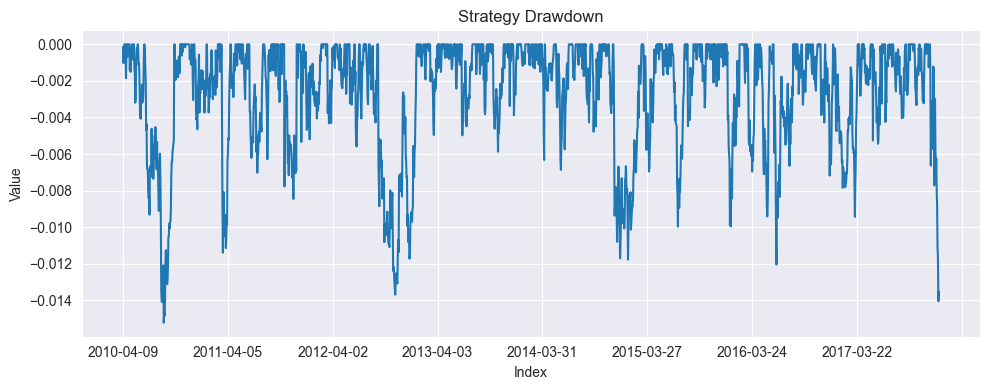

In [35]:
# calc_drawdown
import matplotlib.pyplot as plt

dd_ser, dd_summary = calc_drawdown(strategy_ret['strategy'])

dd_ser.plot(kind='line', title='Strategy Drawdown', figsize=(10, 4))
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
#drawdown magnitude and length
dd_summary.sort_values('trough_size', ascending=True).head(10)

,start,end,trough_size,trough_time
7,2010-06-23,2010-10-01,-0.015230,2010-08-26
56,2012-09-06,2013-01-18,-0.013688,2012-11-05
163,2016-06-08,2016-08-12,-0.012042,2016-06-16
126,2014-12-01,2015-03-10,-0.011774,2015-01-21
18,2011-03-15,2011-04-13,-0.011399,2011-03-18
137,2015-06-23,2015-08-05,-0.009967,2015-07-13
155,2015-12-28,2016-02-10,-0.009954,2016-01-11
176,2016-12-29,2017-03-24,-0.009432,2017-03-15
162,2016-04-22,2016-06-03,-0.009412,2016-05-16
37,2011-10-17,2011-11-28,-0.008457,2011-11-15


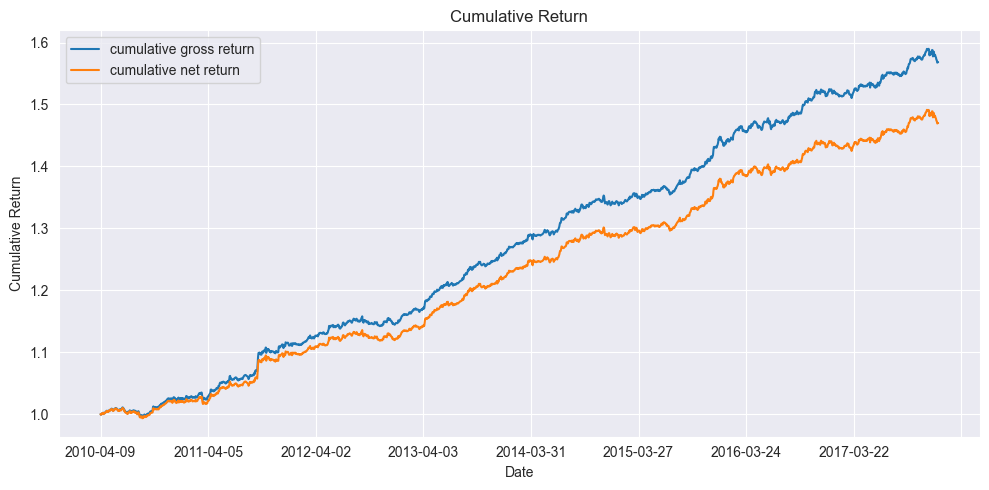

In [34]:
input_df = pd.DataFrame({'gross_ret': strategy_ret['strategy'],
                             'to': strategy_turn['strategy']})
input_df['cost'] = input_df['to'] * 1e-4
input_df['net_ret'] = input_df['gross_ret'] - input_df['cost']
input_df['cumulative gross return'] = (1 + input_df['gross_ret']).cumprod()
input_df['cumulative net return'] = (1 + input_df['net_ret']).cumprod()
df = pd.concat([input_df['cumulative gross return'] , input_df['cumulative net return']], axis=1)
df.plot(kind='line', figsize=(10, 5), title='Cumulative Return')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.tight_layout()
plt.show()